In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import re
import random
from tabulate import tabulate
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

### process to decipher response

In [3]:
def evaluate_options(row) -> list[bool]:
    #print(row['Response'])
    options = row['Response'].split('\n')
    #print(options)
    if len(options) != 3:
        return special_eval(row['Response'], len(options))
    results = []
    for option in options:
        #print(option)
        #check how many lines it has and skip
        if 'not true' in option.lower():
            results.append(False)
        elif 'false' in option.lower():
            results.append(False)
            #row[count] = False
        elif 'true' in option.lower():
            results.append(True)
            #row[count] = True
        else:
            results.append(np.nan)
            #print("cry")
            
            
    return results

def special_eval(response, num):
    
    options = response.split('Option')
    #options = re.split(r'\sII[.:]|III[.:]', response)
    #print(options)
    
    
    if len(options) <= 3:
        results = [False, False, False]
        for option in options:
            if (' I:' in option or ' I.' in option or ' I ' in option) and ('false' not in option.lower() and 'not true' not in option.lower()):
                results[0] = True
            if (' II:' in option or ' II.' in option or ' II ' in option) and ('false' not in option.lower() and 'not true' not in option.lower()):
                results[1] = True
            if (' III:' in option or ' III.' in option or ' III ' in option) and ('false' not in option.lower() and 'not true' not in option.lower()):
                results[2] = True
        return results
        
    results = [np.nan, np.nan, np.nan]
    for option in options:
        
        if ((' I:' in option or ' I.' in option or ' I ' in option) and ('not true' in option.lower())):
            results[0] = False
            
        elif ((' II:' in option or ' II.' in option or ' II ' in option) and ('not true' in option.lower())):
            results[1] = False
            
        elif ((' III:' in option or ' III.' in option or ' III ' in option) and ('not true' in option.lower())):
            results[2] = False
            
        elif ((' I:' in option or ' I.' in option or ' I ' in option) and ('false' in option.lower())):
            results[0] = False
           
        elif ((' II:' in option or ' II.' in option or ' II ' in option) and ('false' in option.lower())):
            results[1] = False

        elif ((' III:' in option or ' III.' in option or ' III ' in option) and ('false' in option.lower())):
            results[2] = False
        
        elif ((' I:' in option or ' I.' in option or ' I ' in option) and ('true' in option.lower())):
            results[0] = True
       
        elif ((' II:' in option or ' II.' in option or ' II ' in option) and ('true' in option.lower())):
            results[1] = True
          
        elif ((' III:' in option or ' III.' in option or ' III ' in option) and ('true' in option.lower())):
            results[2] = True
           

            
    return results 

In [4]:
def process_df(df):
    df['I'] = np.nan
    df['II'] = np.nan
    df['III'] = np.nan
    df['num_correct'] = np.nan
    
    for num in range(len(df)):
        row_data = df.iloc[num]
        #print(row_data)
        answers = evaluate_options(row_data)
        #print("answers are", answers)
        df.loc[num, 'I'] = answers[0]
        df.loc[num, 'II'] = answers[1]
        df.loc[num, 'III'] = answers[2]
        
        correct = 0
        notna = 0
        
        if answers[0] == False or answers[0] == True:
            notna += 1
            if answers[0] == False:
                correct += 1
            
            
        if answers[1] == False or answers[1] == True:
            notna += 1
            if answers[1] == True:
                correct += 1 
           
        
        if answers[2] == False or answers[2] == True:
            notna += 1
            if answers[2] == True:
                correct += 1 
        
        if notna != 3:
            df.loc[num, 'num_correct'] = np.nan
        else:
            df.loc[num, 'num_correct'] = correct 
    
    
    return df

In [5]:
def count_num_corr(df):
    df['num_correct'] = ((df['I'] == False).astype(int) +
                         df['II'].astype(int) +
                         df['III'].astype(int))
    
    return df

### various questions + loading them

In [6]:
df1 = pd.read_csv("PythonsFact.csv")
df1.head()
df1 = process_df(df1)
print(df1.describe())

       num_correct
count    96.000000
mean      2.822917
std       0.383743
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000


In [7]:
df2 = pd.read_csv("PythonsNonFact.csv")
df2.head()
df2 = process_df(df2)
print(df2.describe())

       num_correct
count    99.000000
mean      2.818182
std       0.413142
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000


In [8]:
# df3 = pd.read_csv("NounsFact.csv")
# df3.head()
# df3 = process_df(df3)
# print(df3.describe())

#never used this dataset, had random made up nouns

In [9]:
df4 = pd.read_csv("ChickensFact.csv")
df4.head()
df4 = process_df(df4)
print(df4.describe())

       num_correct
count    97.000000
mean      2.216495
std       0.438435
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000


In [10]:
df5 = pd.read_csv("ChickensNonFact.csv")
df5.head()
df5 = process_df(df5)
print(df5.describe())

       num_correct
count    94.000000
mean      2.595745
std       0.554922
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000


In [11]:
df6 = pd.read_csv("HumansFact.csv")
df6.head()
df6 = process_df(df6)
print(df6.describe())

       num_correct
count    91.000000
mean      2.725275
std       0.472956
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000


In [12]:
df7 = pd.read_csv("HumansNonFact.csv")
df7.head()
df7 = process_df(df7)
print(df7.describe())

       num_correct
count    92.000000
mean      2.565217
std       0.540743
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000


In [13]:
df8 = pd.read_csv("ShapesFact.csv")
df8.head()
df8 = process_df(df8)
print(df8.describe())

       num_correct
count    89.000000
mean      2.539326
std       0.501275
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000


In [14]:
df9 = pd.read_csv("ShapesNonFact.csv")
df9.head()
df9 = process_df(df9)
print(df9.describe())

       num_correct
count    96.000000
mean      2.479167
std       0.597876
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000


### concatinate dfs

In [15]:
df = pd.concat([df1, df2, df4, df5, df6, df7, df8, df9])
df.groupby(['Type', 'Fact']).describe()
df_pythons = pd.concat([df1, df2])
df_chickens = pd.concat([df4, df5])
df_humans = pd.concat([df6, df7])
df_shapes = pd.concat([df8, df9])

### fixing nan values

In [16]:
print(df.isna().sum())

Type            0
Fact            0
Response        0
I              31
II             28
III            26
num_correct    46
dtype: int64


In [17]:
#pythons
print(df_pythons[df_pythons['num_correct'].isna()])

       Type         Fact  \
11  Pythons      Factual   
17  Pythons      Factual   
55  Pythons      Factual   
83  Pythons      Factual   
4   Pythons  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                          Response  \
11  - Option I. All snakes lay eggs: Uncertain. While Fact 3 indicates that female snakes lay eggs, it does not specify whether all snakes are female.\n- Option II. Pythonistas are snakes: True. By Fact 1, all pythons are snakes, and by Fact 2, some pythons are pythonistas.\n- Option III. Some pythons are not pythonistas: True. Fact 2 indicates that some pythons are pythonistas, which impli

In [18]:
df_pythons.at[11, 'I'] = 'unknown'
df_pythons.at[17, 'I'] = 'unknown'
df_pythons.at[55, 'I'] = True
df_pythons.at[55, 'III'] = False
df_pythons.at[83, 'I'] = 'unknown'
df_pythons.iloc[100+4, 3] = False
df_pythons.iloc[100+4, 4] = True
df_pythons.iloc[100+4, 5] = True

print(df_pythons[df_pythons['num_correct'].isna()])

       Type         Fact  \
11  Pythons      Factual   
17  Pythons      Factual   
55  Pythons      Factual   
83  Pythons      Factual   
4   Pythons  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                          Response  \
11  - Option I. All snakes lay eggs: Uncertain. While Fact 3 indicates that female snakes lay eggs, it does not specify whether all snakes are female.\n- Option II. Pythonistas are snakes: True. By Fact 1, all pythons are snakes, and by Fact 2, some pythons are pythonistas.\n- Option III. Some pythons are not pythonistas: True. Fact 2 indicates that some pythons are pythonistas, which impli

In [19]:
#chickens
print(df_chickens[df_chickens['num_correct'].isna()])

        Type         Fact  \
55  Chickens      Factual   
73  Chickens      Factual   
81  Chickens      Factual   
11  Chickens  Non-Factual   
12  Chickens  Non-Factual   
29  Chickens  Non-Factual   
42  Chickens  Non-Factual   
72  Chickens  Non-Factual   
97  Chickens  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Response  \
55  From the given facts:\n- Chickens are b

In [20]:
df_chickens.iloc[55, 3] = False
df_chickens.iloc[73, 3] = False
df_chickens.iloc[73, 4] = True
df_chickens.iloc[73, 5] = True
df_chickens.iloc[81, 3] = False
df_chickens.iloc[81, 4] = True
df_chickens.iloc[81, 5] = True
df_chickens.iloc[100+11, 5] = True
df_chickens.iloc[100+12, 3] = False
df_chickens.iloc[100+12, 4] = True
df_chickens.iloc[100+12, 5] = True
df_chickens.iloc[100+29, 3] = False
df_chickens.iloc[100+42, 3] = True
df_chickens.iloc[100+42, 4] = True
df_chickens.iloc[100+42, 5] = True
df_chickens.iloc[100+72, 3] = 'unknown'
df_chickens.iloc[100+97, 3] = False
df_chickens.iloc[100+97, 4] = True
df_chickens.iloc[100+97, 5] = True

print(df_chickens[df_chickens['num_correct'].isna()])

        Type         Fact  \
55  Chickens      Factual   
73  Chickens      Factual   
81  Chickens      Factual   
11  Chickens  Non-Factual   
12  Chickens  Non-Factual   
29  Chickens  Non-Factual   
42  Chickens  Non-Factual   
72  Chickens  Non-Factual   
97  Chickens  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Response  \
55  From the given facts:\n- Chickens are b

In [21]:
#humans
print(df_humans[df_humans['num_correct'].isna()])

      Type         Fact  \
1   Humans      Factual   
21  Humans      Factual   
23  Humans      Factual   
27  Humans      Factual   
40  Humans      Factual   
59  Humans      Factual   
63  Humans      Factual   
76  Humans      Factual   
81  Humans      Factual   
40  Humans  Non-Factual   
46  Humans  Non-Factual   
48  Humans  Non-Factual   
58  Humans  Non-Factual   
67  Humans  Non-Factual   
68  Humans  Non-Factual   
74  Humans  Non-Factual   
85  Humans  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [22]:
df_humans.iloc[1, 3] = False
df_humans.iloc[21, 3] = True
df_humans.iloc[21, 4] = True
df_humans.iloc[21, 5] = True
df_humans.iloc[23, 3] = True
df_humans.iloc[23, 4] = True
df_humans.iloc[23, 5] = True
df_humans.iloc[27, 3] = False
df_humans.iloc[27, 4] = True
df_humans.iloc[40, 5] = True
df_humans.iloc[59, 5] = True
df_humans.iloc[63, 3] = False
df_humans.iloc[76, 5] = True
df_humans.iloc[81, 4] = True
df_humans.iloc[81, 5] = True
df_humans.iloc[100+40, 3] = False
df_humans.iloc[100+40, 4] = True
df_humans.iloc[100+46, 3] = True
df_humans.iloc[100+46, 4] = True
df_humans.iloc[100+46, 5] = True
df_humans.iloc[100+48, 3] = True
df_humans.iloc[100+48, 4] = True
df_humans.iloc[100+48, 5] = True
df_humans.iloc[100+58, 3] = False
df_humans.iloc[100+58, 4] = True
df_humans.iloc[100+58, 5] = False
df_humans.iloc[100+67, 3] = False
df_humans.iloc[100+67, 5] = True
df_humans.iloc[100+68, 3] = True
df_humans.iloc[100+68, 4] = True
df_humans.iloc[100+68, 5] = True
df_humans.iloc[100+74, 3] = False
df_humans.iloc[100+74, 4] = True
df_humans.iloc[100+74, 5] = False
df_humans.iloc[100+85, 3] = False
df_humans.iloc[100+85, 4] = True
df_humans.iloc[100+85, 5] = True

print(df_humans[df_humans['num_correct'].isna()])

      Type         Fact  \
1   Humans      Factual   
21  Humans      Factual   
23  Humans      Factual   
27  Humans      Factual   
40  Humans      Factual   
59  Humans      Factual   
63  Humans      Factual   
76  Humans      Factual   
81  Humans      Factual   
40  Humans  Non-Factual   
46  Humans  Non-Factual   
48  Humans  Non-Factual   
58  Humans  Non-Factual   
67  Humans  Non-Factual   
68  Humans  Non-Factual   
74  Humans  Non-Factual   
85  Humans  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [23]:
#shapes
print(df_shapes[df_shapes['num_correct'].isna()])

      Type         Fact  \
15  Shapes      Factual   
18  Shapes      Factual   
26  Shapes      Factual   
31  Shapes      Factual   
33  Shapes      Factual   
37  Shapes      Factual   
39  Shapes      Factual   
41  Shapes      Factual   
44  Shapes      Factual   
69  Shapes      Factual   
76  Shapes      Factual   
20  Shapes  Non-Factual   
66  Shapes  Non-Factual   
72  Shapes  Non-Factual   
79  Shapes  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [24]:
df_shapes.iloc[15, 4] = True
df_shapes.iloc[18, 3] = False
df_shapes.iloc[18, 4] = True
df_shapes.iloc[18, 5] = False
df_shapes.iloc[26, 3] = False
df_shapes.iloc[26, 4] = True
df_shapes.iloc[31, 3] = False
df_shapes.iloc[31, 4] = False
df_shapes.iloc[31, 5] = False
df_shapes.iloc[33, 3] = False
df_shapes.iloc[33, 4] = True
df_shapes.iloc[37, 3] = False
df_shapes.iloc[37, 4] = True
df_shapes.iloc[37, 5] = True
df_shapes.iloc[39, 5] = True
df_shapes.iloc[41, 3] = False
df_shapes.iloc[41, 4] = True
df_shapes.iloc[41, 5] = False
df_shapes.iloc[44, 3] = False
df_shapes.iloc[44, 4] = True
df_shapes.iloc[44, 5] = True
df_shapes.iloc[69, 3] = False
df_shapes.iloc[69, 4] = True
df_shapes.iloc[69, 5] = True
df_shapes.iloc[76, 3] = False
df_shapes.iloc[76, 4] = True
df_shapes.iloc[76, 5] = True
df_shapes.iloc[100+20, 3] = False
df_shapes.iloc[100+20, 4] = True
df_shapes.iloc[100+20, 5] = False
df_shapes.iloc[100+66, 3] = False
df_shapes.iloc[100+72, 3] = False
df_shapes.iloc[100+72, 4] = True
df_shapes.iloc[100+79, 3] = False
df_shapes.iloc[100+79, 5] = True

print(df_shapes[df_shapes['num_correct'].isna()])

      Type         Fact  \
15  Shapes      Factual   
18  Shapes      Factual   
26  Shapes      Factual   
31  Shapes      Factual   
33  Shapes      Factual   
37  Shapes      Factual   
39  Shapes      Factual   
41  Shapes      Factual   
44  Shapes      Factual   
69  Shapes      Factual   
76  Shapes      Factual   
20  Shapes  Non-Factual   
66  Shapes  Non-Factual   
72  Shapes  Non-Factual   
79  Shapes  Non-Factual   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

79  False   True   True          NaN  


In [25]:
#permutation testing prep 
count_num_corr(df_pythons)
count_num_corr(df_humans)
count_num_corr(df_shapes)
count_num_corr(df_chickens)

dfall = pd.concat([df_pythons, df_humans, df_shapes, df_chickens])

In [26]:
print(dfall['Type'].value_counts())

Pythons     200
Humans      200
Shapes      200
Chickens    200
Name: Type, dtype: int64


In [27]:
dfall['I_correct'] = np.where(dfall['I'] == False, 'correct', 'incorrect')
dfall['II_correct'] = np.where(dfall['II'] == True, 'correct', 'incorrect')
dfall['III_correct'] = np.where(dfall['III'] == True, 'correct', 'incorrect')

In [28]:
stuff = ['I', 'II', 'III']
dfall.groupby(['Type', 'Fact'])[stuff].value_counts(dropna=False)

Type      Fact         I        II     III  
Chickens  Factual      True     True   True     50
                       False    True   True     25
                                       False    23
                                False  False     1
                                       True      1
          Non-Factual  False    True   True     63
                                       False    28
                       True     True   True      5
                       False    False  False     2
                       unknown  True   True      1
                       True     True   False     1
Humans    Factual      False    True   True     72
                                       False    14
                       True     True   True     13
                       False    False  False     1
          Non-Factual  False    True   True     57
                                       False    34
                       True     True   True      7
                                     

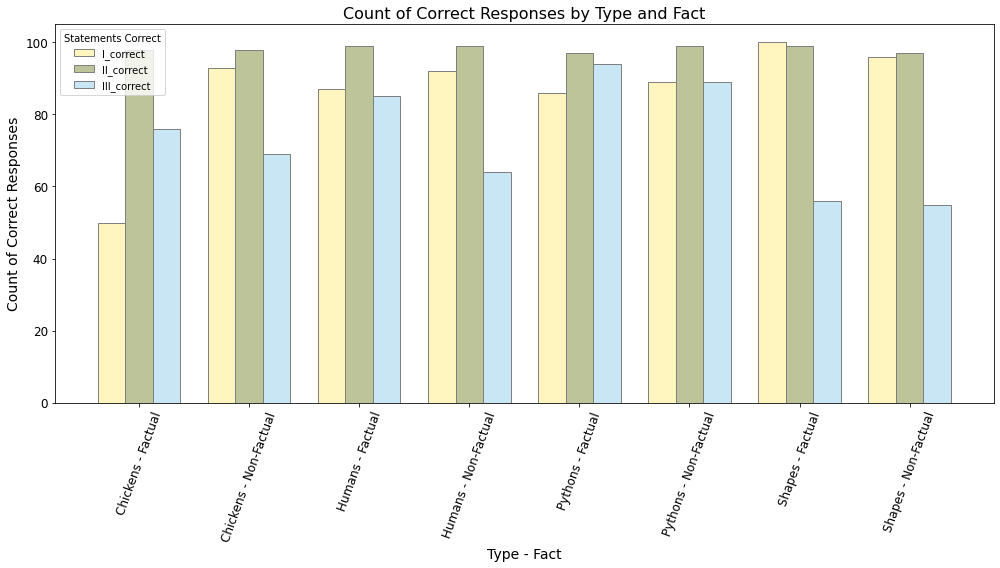

In [29]:
# combine 'Type' and 'Fact'
dfall['Type_Fact'] = dfall['Type'] + ' - ' + dfall['Fact'].astype(str)

correct_counts = dfall.groupby('Type_Fact')[['I_correct', 'II_correct', 'III_correct']].apply(lambda x: (x == 'correct').sum())

fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.25
r1 = np.arange(len(correct_counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#plot
ax.bar(r1, correct_counts['I_correct'], color='#fff5be', width=bar_width, edgecolor='grey', label='I_correct')
ax.bar(r2, correct_counts['II_correct'], color='#bdc499', width=bar_width, edgecolor='grey', label='II_correct')
ax.bar(r3, correct_counts['III_correct'], color='#c8e6f3', width=bar_width, edgecolor='grey', label='III_correct')

#labels
ax.set_xlabel('Type - Fact', fontsize=14)
ax.set_ylabel('Count of Correct Responses', fontsize=14)
ax.set_title('Count of Correct Responses by Type and Fact', fontsize=16)

ax.set_xticks([r + bar_width for r in range(len(correct_counts))])
ax.set_xticklabels(correct_counts.index, rotation=70, fontsize=12)

ax.tick_params(axis='y', labelsize=12)

ax.legend(title='Statements Correct', title_fontsize=10, fontsize=10)

plt.tight_layout()
plt.show()


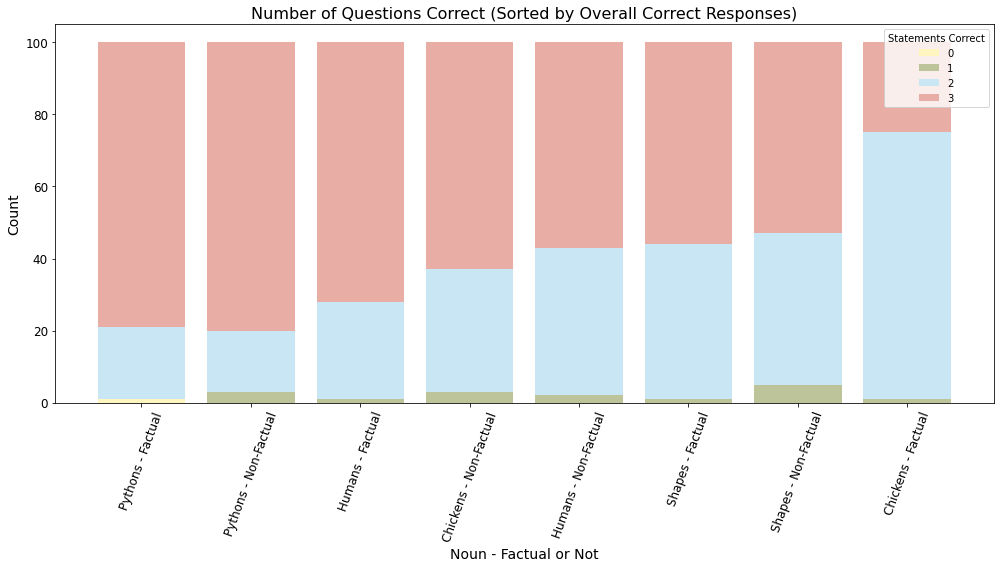

In [30]:
grouped = dfall.groupby(['Type', 'Fact', 'num_correct']).size().unstack(fill_value=0).reset_index()
num_correct_values = grouped.columns[2:]
grouped['total_correct'] = grouped[num_correct_values].multiply(num_correct_values, axis=1).sum(axis=1)
sorted_grouped = grouped.sort_values(by='total_correct', ascending=False).reset_index(drop=True)

sorted_grouped = sorted_grouped.drop(columns=['total_correct'])

custom_colors = ['#fff5be', '#bdc499','#c8e6f3', '#e8ada5']
bar_width = 0.8
fig, ax = plt.subplots(figsize=(14, 8))

# plot
bottom = None
for i, num_correct in enumerate(num_correct_values):
    if bottom is None:
        bottom = sorted_grouped[num_correct]
        ax.bar(sorted_grouped.index, sorted_grouped[num_correct], label=num_correct, color=custom_colors[i % len(custom_colors)], width=bar_width)
    else:
        ax.bar(sorted_grouped.index, sorted_grouped[num_correct], label=num_correct, bottom=bottom, color=custom_colors[i % len(custom_colors)], width=bar_width)
        bottom += sorted_grouped[num_correct]

# label
ax.set_xlabel('Noun - Factual or Not', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Questions Correct (Sorted by Overall Correct Responses)', fontsize=16)

sorted_grouped['Type_Fact'] = sorted_grouped['Type'] + ' - ' + sorted_grouped['Fact'].astype(str)
ax.set_xticks(sorted_grouped.index)
ax.set_xticklabels(sorted_grouped['Type_Fact'], rotation=70, fontsize=12)

ax.tick_params(axis='y', labelsize=12)

ax.legend(title='Statements Correct', title_fontsize=10, fontsize=10)

plt.tight_layout()
plt.show()


### permutation testing

In [31]:
def permtest(df, num_perms):
    count = 0
    #current tstat  
    cfact = df[df['Fact'] == 'Factual']['num_correct'].mean()
    cnonfact = df[df['Fact'] == 'Non-Factual']['num_correct'].mean()        
    current_tstat = (cfact - cnonfact) 
    print('Current test statistic: ', current_tstat)
    
    permdata = [] 
    labels = ['Factual', 'Non-Factual'] * 100
    df['assigned'] = np.nan
    
    #perm testing 
    for num in range(0, num_perms):
        #assignment 
        random.shuffle(labels)
        df['assigned'] = labels[:len(df)]

        #calculate stats  
        fact = df[df['assigned'] == 'Factual']['num_correct'].mean()
        nonfact = df[df['assigned'] == 'Non-Factual']['num_correct'].mean()        
        tstat = (fact - nonfact) 
        permdata.append(tstat)
        
        #count extremes
        if abs(tstat) > abs(current_tstat):
            count+=1
            #print(tstat)
        
    pval = count / num_perms
    return current_tstat, permdata, pval

In [32]:
#run pt 
current_tstat1, data, pval = permtest(df_pythons, 10000)
current_tstat2, data2, pval2  = permtest(df_chickens, 10000)
current_tstat3, data3, pval3  = permtest(df_humans, 10000)
current_tstat4, data4, pval4 = permtest(df_shapes, 10000)
print('The p-values are: ', pval, ',', pval2, ',', pval3, ',', pval4)

Current test statistic:  0.0
Current test statistic:  -0.3599999999999999
Current test statistic:  0.16000000000000014
Current test statistic:  0.06999999999999984
The p-values are:  0.8864 , 0.0 , 0.0182 , 0.3054


In [33]:
data = [['Pythons', current_tstat1, pval], 
        ['Chickens', current_tstat2, pval2],
       ['Humans', current_tstat3, pval3],
       ['Shapes', current_tstat4, pval4]]

df_data = pd.DataFrame(data, columns=['Question Type', 'Actual Mean Difference', 
                                      'p-value']).reset_index(drop=True)
print(tabulate(df_data, headers='keys', tablefmt='fancy_outline', showindex=False))

╒═════════════════╤══════════════════════════╤═══════════╕
│ Question Type   │   Actual Mean Difference │   p-value │
╞═════════════════╪══════════════════════════╪═══════════╡
│ Pythons         │                     0    │    0.8864 │
│ Chickens        │                    -0.36 │    0      │
│ Humans          │                     0.16 │    0.0182 │
│ Shapes          │                     0.07 │    0.3054 │
╘═════════════════╧══════════════════════════╧═══════════╛


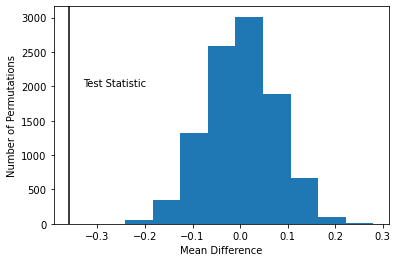

In [34]:
#print(data2)
plt.hist(data2)
plt.xlabel("Mean Difference")
plt.ylabel("Number of Permutations")
plt.text(-0.33, 2000, 'Test Statistic')
plt.axvline(x = -0.36, color = 'black')

In [35]:
df_chickens.groupby('Fact')['num_correct'].value_counts()

Fact         num_correct
Factual      2              74
             3              25
             1               1
Non-Factual  3              63
             2              34
             1               3
Name: num_correct, dtype: int64

In [36]:
#df_chickens[df_chickens['Fact'] == 'Factual'] #checking responses

In [37]:
#df_chickens[df_chickens['Fact'] == 'Non-Factual'] #checking responses

In [38]:
df_chickens.groupby('Fact')['I', 'II', 'III'].value_counts(dropna=False)

/var/folders/5z/s5qlt2g95tj4d40cy5ll0pm40000gn/T/ipykernel_41735/3536741762.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_chickens.groupby('Fact')['I', 'II', 'III'].value_counts(dropna=False)


Fact         I        II     III  
Factual      True     True   True     50
             False    True   True     25
                             False    23
                      False  False     1
                             True      1
Non-Factual  False    True   True     63
                             False    28
             True     True   True      5
             False    False  False     2
             True     True   False     1
             unknown  True   True      1
dtype: int64

In [39]:
df_humans.groupby('Fact')['I', 'II', 'III'].value_counts(dropna=False)

/var/folders/5z/s5qlt2g95tj4d40cy5ll0pm40000gn/T/ipykernel_41735/1443281902.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_humans.groupby('Fact')['I', 'II', 'III'].value_counts(dropna=False)


Fact         I      II     III  
Factual      False  True   True     72
                           False    14
             True   True   True     13
             False  False  False     1
Non-Factual  False  True   True     57
                           False    34
             True   True   True      7
             False  False  False     1
             True   True   False     1
dtype: int64

In [40]:
#df_humans[df_humans['Fact'] == 'Factual']

In [41]:
#df_humans[df_humans['Fact'] == 'Non-Factual']

In [42]:
condition = (((dfall['I'] == 'unknown') | (dfall['II'] == 'unknown') | (dfall['III'] == 'unknown')) & (dfall['Type_Fact'] != 'Pythons - Non-Factual'))

df_unknown = dfall[condition]
df_unknown

,Type,Fact,Response,I,II,III,num_correct,I_correct,II_correct,III_correct,Type_Fact
11,Pythons,Factual,"- Option I. All snakes lay eggs: Uncertain. While Fact 3 indicates that female snakes lay eggs, it does not specify whether all snakes are female.\n- Option II. Pythonistas are snakes: True. By Fact 1, all pythons are snakes, and by Fact 2, some pythons are pythonistas.\n- Option III. Some pythons are not pythonistas: True. Fact 2 indicates that some pythons are pythonistas, which implies that some pythons are not pythonistas.",unknown,True,True,2,incorrect,correct,correct,Pythons - Factual
17,Pythons,Factual,"- Option I. All snakes lay eggs. (Unknown, given premise 3 only mentions female snakes lay eggs).\n- Option II. Pythonistas are snakes. (True, given premise 2 states some Pythons are pythonistas, and premise 1 states all Pythons are snakes)\n- Option III. Some pythons are not pythonistas. (True, given the information provided)",unknown,True,True,2,incorrect,correct,correct,Pythons - Factual
83,Pythons,Factual,Option I. All snakes lay eggs: Not enough information given.\nOption II. Pythonistas are snakes: True. (All pythons are snakes.)\nOption III. Some pythons are not pythonistas: True. (Some pythons are not pythonistas.),unknown,True,True,2,incorrect,correct,correct,Pythons - Factual
72,Chickens,Non-Factual,"Option I. All birds lay eggs - Cannot be determined from the provided facts.\nOption II. Chickens are birds - True (Fact 1 states that all hens are birds, and Fact 2 states that some hens are chickens.)\nOption III. Some hens are not chickens - True (Fact 2 states that some hens are chickens, implying that some hens are not chickens.)",unknown,True,True,2,incorrect,correct,correct,Chickens - Non-Factual
